# Titanic - Machine Learning from Disaster

## The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## How I'll tackle the problem

In my past notebook I've tried some common Machine Learning classification models without knowing so much how exactly they work. So now, I'll make a comparisson between some models: Logistic Regression, Tree Classifier, Random Forest, XGBoost and a Neural Network. I'll try to put my thoughts on markdowns to explain better why I'm doing certain things.

## Summary
* Importing Libraries;
* Importing Data;
* EDA & Feature Engineering;
* Building Models and Tunning it;
* Predicting;
* Conclusion.

### Importing Libraries

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Importing Data

In [121]:
df_train = pd.read_csv("../titanic-disaster-competition/data/train.csv")
df_test = pd.read_csv("../titanic-disaster-competition/data/test.csv")

### EDA & Feature Engineering

#### Light Data Exploration

In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This dataset have some null values on Age, Cabin and Embarked features, If I use those, I'll have to handle that.

In [123]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Judging by the high value of standard deviation, if I use this Fare or PassengerId feature I'll probably have to normalize the data.

In [124]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


There are some features here like Sex, Ticket, Cabin and Embarked that I'll probably have to OneHotEncode if I want to use it. The names and PassengerId probably won't be useful, so I'll just drop later.

In [126]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
for i in df_train["Pclass"].unique():
    print(f"Total Passengers divided by Pclass {i}: {len(df_train[df_train['Pclass'] == i])}")
    print(f"Survived Passengers from Pclass {i}: {len(df_train[(df_train['Pclass'] == i) & (df_train['Survived'] == 1)])}")
    
survival_rate = df_train.groupby('Pclass')['Survived'].mean()

Total Passengers divided by Pclass 3: 491
Survived Passengers from Pclass 3: 119
Total Passengers divided by Pclass 1: 216
Survived Passengers from Pclass 1: 136
Total Passengers divided by Pclass 2: 184
Survived Passengers from Pclass 2: 87


The class aren't equally distributed, so I'll print the graphs with the mean to know better the rate of survival.

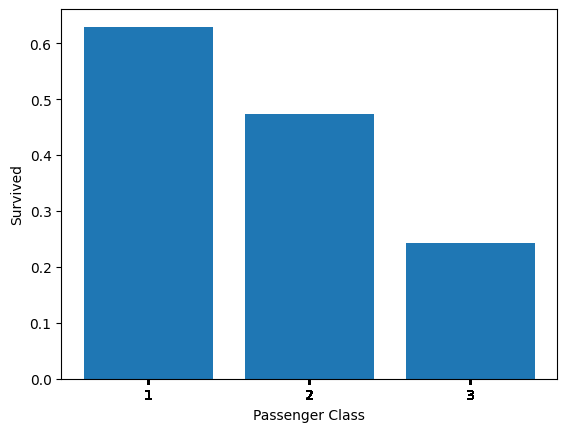

In [128]:
plt.bar(survival_rate.index, survival_rate.values)
plt.xticks(df_train["Pclass"])
plt.xlabel("Passenger Class")
plt.ylabel("Survived")
plt.show()

It appears that people from the first class have a higher rate of survival than those from other classes.

In [129]:
for i in df_train["Sex"].unique():
    print(f"Total Passengers divided by Sex {i}: {len(df_train[df_train['Sex'] == i])}")
    print(f"Survived Passengers from Sex {i}: {len(df_train[(df_train['Sex'] == i) & (df_train['Survived'] == 1)])}")      

survival_rate = df_train.groupby("Sex")["Survived"].mean()  

Total Passengers divided by Sex male: 577
Survived Passengers from Sex male: 109
Total Passengers divided by Sex female: 314
Survived Passengers from Sex female: 233


Again, the total amount of people from sex male and female are different, form now, If it is like that I'll just print the graphs with the mean to know the rate of survival.

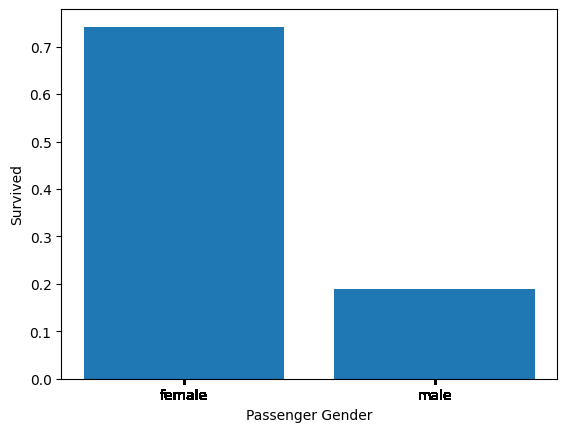

In [130]:

plt.bar(survival_rate.index, survival_rate.values)
plt.xticks(df_train["Sex"])
plt.xlabel("Passenger Gender")
plt.ylabel("Survived")
plt.show()

Female passengers have a really hiegher rate of survival than males.

In [131]:
for i in df_train["SibSp"].unique():
    print(f"Total Passengers divided by SibSp {i}: {len(df_train[df_train['SibSp'] == i])}")
    print(f"Survived Passengers from SibSp {i}: {len(df_train[(df_train['SibSp'] == i) & (df_train['Survived'] == 1)])}")
    
survival_rate = df_train.groupby("SibSp")["Survived"].mean()

Total Passengers divided by SibSp 1: 209
Survived Passengers from SibSp 1: 112
Total Passengers divided by SibSp 0: 608
Survived Passengers from SibSp 0: 210
Total Passengers divided by SibSp 3: 16
Survived Passengers from SibSp 3: 4
Total Passengers divided by SibSp 4: 18
Survived Passengers from SibSp 4: 3
Total Passengers divided by SibSp 2: 28
Survived Passengers from SibSp 2: 13
Total Passengers divided by SibSp 5: 5
Survived Passengers from SibSp 5: 0
Total Passengers divided by SibSp 8: 7
Survived Passengers from SibSp 8: 0


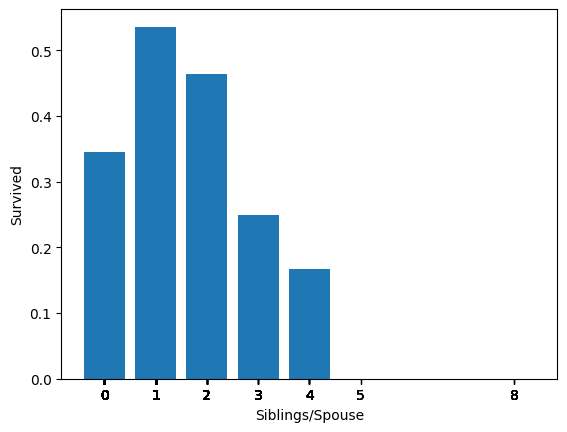

In [132]:
plt.bar(survival_rate.index, survival_rate.values)
plt.xticks(df_train["SibSp"])
plt.xlabel("Siblings/Spouse")
plt.ylabel("Survived")
plt.show()

We can't know exacly if it really influence in the survival rate because we haeve just a few people with 3 or more Siblings and a Spouse, but with that data that we have, it appears that the less people on the family, bigger is the rate of survival

In [133]:
for i in df_train["Parch"].unique():
    print(f"Total Passengers divided by Parch {i}: {len(df_train[df_train['Parch'] == i])}")
    print(f"Survived Passengers from Parch {i}: {len(df_train[(df_train['Parch'] == i) & (df_train['Survived'] == 1)])}")
    
survival_rate = df_train.groupby("Parch")["Survived"].mean()

Total Passengers divided by Parch 0: 678
Survived Passengers from Parch 0: 233
Total Passengers divided by Parch 1: 118
Survived Passengers from Parch 1: 65
Total Passengers divided by Parch 2: 80
Survived Passengers from Parch 2: 40
Total Passengers divided by Parch 5: 5
Survived Passengers from Parch 5: 1
Total Passengers divided by Parch 3: 5
Survived Passengers from Parch 3: 3
Total Passengers divided by Parch 4: 4
Survived Passengers from Parch 4: 0
Total Passengers divided by Parch 6: 1
Survived Passengers from Parch 6: 0


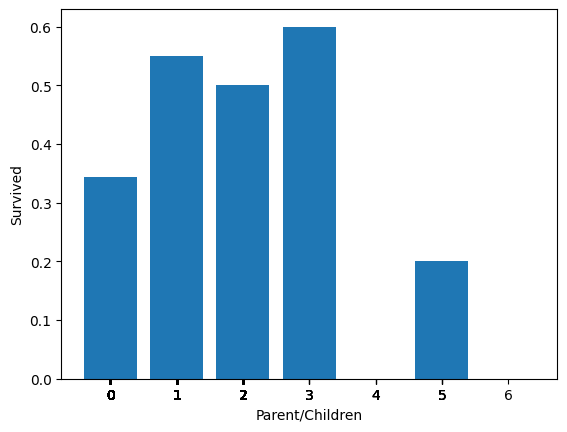

In [134]:
plt.bar(survival_rate.index, survival_rate.values)
plt.xticks(df_train["Parch"])
plt.xlabel("Parent/Children")
plt.ylabel("Survived")
plt.show()

The data is even more skewed, making it challenging to draw meaningful conclusions due to the significant discrepancy in the amounts of data, tho people with at least a children/ or a children with parents appears to have a higher survival rate. Maybe plotting the survival rate combined with age we can see if childrens has a really higher survival rate.

In [135]:
for i in df_train["Embarked"].unique():
    print(f"Total Passengers divided by Embarked {i}: {len(df_train[df_train['Embarked'] == i])}")
    print(f"Survived Passengers from Embarked {i}: {len(df_train[(df_train['Embarked'] == i) & (df_train['Survived'] == 1)])}")

survival_rate = df_train.groupby("Embarked")["Survived"].mean()

Total Passengers divided by Embarked S: 644
Survived Passengers from Embarked S: 217
Total Passengers divided by Embarked C: 168
Survived Passengers from Embarked C: 93
Total Passengers divided by Embarked Q: 77
Survived Passengers from Embarked Q: 30
Total Passengers divided by Embarked nan: 0
Survived Passengers from Embarked nan: 0


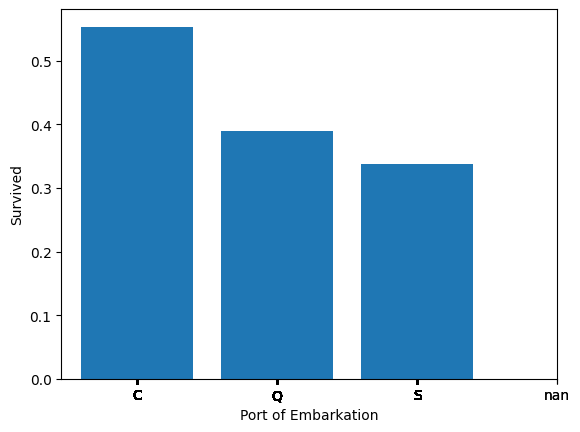

In [136]:
# Just converting from object to string so it doesnt show any error when plotting
df_train["Embarked"] = df_train["Embarked"].astype(str) 

plt.bar(survival_rate.index, survival_rate.values)
plt.xticks(df_train["Embarked"])
plt.xlabel("Port of Embarkation")
plt.ylabel("Survived")
plt.show()

People from Cherbourg (C) had a higher survival rate than those from the others. It doesn't seem to make sense at first, but during the sinking, Cherbourg was wealthier compared to the other cities. Additionally, the survival rate of first-class passengers was higher, so it makes sense that people from Cherbourg survived.

#### Some insight until now:
* I need to handle some null values on Age, Cabin and Embarked features;
* I won't use PassengerID, but maybe I'll use Fare, so I'll have to normalize the data;
* I need to OneHotEncode Sex, Ticket, Cabin and Embarked;
* People from the first class have a higher rate of survival than those from other classes;
* Female passengers have a really higher rate of survival than males;
* It appears that the less people on the family, bigger is the rate of survival;
* People with at least a children appears to have a higher survival rate;
* People from Cherbourg had higher survival rate, probably because they are on the first-class.

#### Feature Engineering

So now, If I want to plot some more informations first I'll need to do some feature engineering, and then I can proceed.

In [170]:
# Custom transformer to drop some columns (PassengerId, Name, Ticket and Cabin)
class DropColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns=self.columns_to_drop) 
    
# Creating the numerical pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creating the categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, ['Fare','Age']),
    ('custom', DropColumnTransformer(['PassengerId', 'Name', 'Ticket', 'Cabin']), 
     ['PassengerId', 'Name', 'Ticket', 'Cabin']),
    ('categorical', categorical_pipeline, ['Sex', 'Embarked'])
], remainder='passthrough')

In [174]:
# Fit and transform the data
X_transformed = preprocessor.fit_transform(df_train)
X_transformed.shape

(891, 11)

In [138]:
# Get the column names after transformation
numeric_columns = preprocessor.transformers_[0][1]['scaler'].get_feature_names_out(['Fare', 'Age'])  # Numeric column names
categorical_columns = preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(['Sex', 'Embarked'])  # Categorical column names

# Identify the passthrough column indices
passthrough_indices = [i for i, col in enumerate(df_train.columns) if col not in ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'Fare', 'Age']]

# Combine all column names including numeric, categorical, and passthrough columns
all_columns = list(numeric_columns) + list(categorical_columns) + list(df_train.columns[passthrough_indices])

# Create the new DataFrame with transformed columns and original column names
df_transformed = pd.DataFrame(X_transformed, columns=all_columns)
df_transformed = df_transformed.drop("Embarked_nan", axis=1)

In [139]:
# Converting back to integer
df_transformed['Sex_male'] = df_transformed['Sex_male'].astype(int)
df_transformed['Embarked_C'] = df_transformed['Embarked_C'].astype(int)
df_transformed['Embarked_Q'] = df_transformed['Embarked_Q'].astype(int)
df_transformed['Embarked_S'] = df_transformed['Embarked_S'].astype(int)
df_transformed['Survived'] = df_transformed['Survived'].astype(int)
df_transformed['Pclass'] = df_transformed['Pclass'].astype(int)
df_transformed['SibSp'] = df_transformed['SibSp'].astype(int)
df_transformed['Parch'] = df_transformed['Parch'].astype(int)

display(df_transformed.head())
display(df_transformed.tail())
display(df_transformed.info())
display(df_transformed.describe())

,Fare,Age,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,SibSp,Parch
0,-0.502445,-0.592481,1,0,0,1,0,3,1,0
1,0.786845,0.638789,0,1,0,0,1,1,1,0
2,-0.488854,-0.284663,0,0,0,1,1,3,0,0
3,0.420730,0.407926,0,0,0,1,1,1,1,0
4,-0.486337,0.407926,1,0,0,1,0,3,0,0


,Fare,Age,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,SibSp,Parch
886,-0.386671,-0.207709,1,0,0,1,0,2,0,0
887,-0.044381,-0.823344,0,0,0,1,1,1,0,0
888,-0.176263,0.000000,0,0,0,1,0,3,1,2
889,-0.044381,-0.284663,1,1,0,0,1,1,0,0
890,-0.492378,0.177063,1,0,1,0,0,3,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fare        891 non-null    float64
 1   Age         891 non-null    float64
 2   Sex_male    891 non-null    int64  
 3   Embarked_C  891 non-null    int64  
 4   Embarked_Q  891 non-null    int64  
 5   Embarked_S  891 non-null    int64  
 6   Survived    891 non-null    int64  
 7   Pclass      891 non-null    int64  
 8   SibSp       891 non-null    int64  
 9   Parch       891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


None

,Fare,Age,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,SibSp,Parch
count,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,3.987333e-18,2.232906e-16,0.647587,0.188552,0.086420,0.722783,0.383838,2.308642,0.523008,0.381594
std,1.000562e+00,1.000562e+00,0.477990,0.391372,0.281141,0.447876,0.486592,0.836071,1.102743,0.806057
min,-6.484217e-01,-2.253155e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-4.891482e-01,-5.924806e-01,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,-3.573909e-01,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
75%,-2.424635e-02,4.079260e-01,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000
max,9.667167e+00,3.870872e+00,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,8.000000,6.000000


Now, with the dataset preprocessed, I can continue to plot some more graphs.

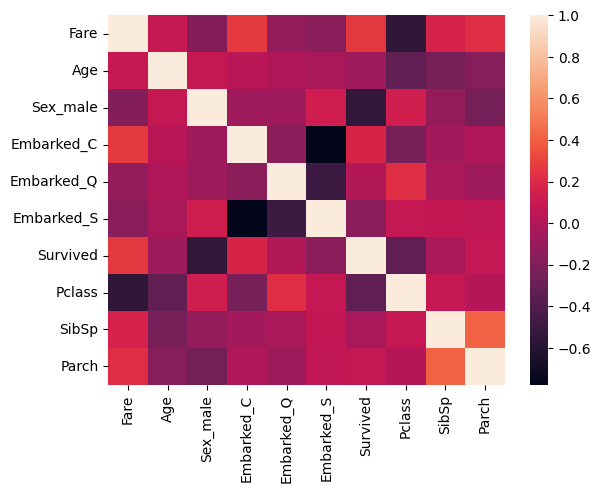

In [140]:
# Create a function of sns heatmap with correlation
sns.heatmap(df_transformed.corr())
plt.show()

So there's some useful informations here:
* People who payed more fare has more chance of survival, same things as people who embarked on C and primary those who are on the first class, all those are highly correlated because they share one thing in common: whealthier people;
* Childrens and Females has more chance of survival too.

### Building Models and Tunning it

Now let's train some models. I'll divide the train_data into train and validation set, and use GridSearchCV to find the best hyperparameters, and then use the model to predict the test dataset.

In [141]:
X_train, X_val, y_train, y_val = train_test_split(df_transformed.drop('Survived', axis=1), df_transformed['Survived'], test_size=0.2, random_state=42)

In [142]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (712, 9)
y_train shape: (712,)
X_val shape: (179, 9)
y_val shape: (179,)


In [143]:
# Define a dictionary to store the best models
models = {
    'LogisticRegression': None,
    'DecisionTreeClassifier': None,
    'RandomForestClassifier': None,
    'XGBClassifier': None
}

# Define the parameter grids for each model
param_grid_logistic = {
    'penalty': ['l2', None],
    'C': [0.1, 1, 10]
}

param_grid_decision_tree = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create GridSearchCV instances for each model with reduced verbosity
grid_search_logistic = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid_logistic, cv=5, verbose=0)
grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_decision_tree, cv=5, verbose=0)
grid_search_random_forest = GridSearchCV(RandomForestClassifier(), param_grid_random_forest, cv=5, verbose=0)
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, verbose=0)

# Fit the GridSearchCV instances
grid_search_logistic.fit(X_train, y_train)
grid_search_decision_tree.fit(X_train, y_train)
grid_search_random_forest.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Store the best models in the dictionary
models['LogisticRegression'] = grid_search_logistic.best_estimator_
models['DecisionTreeClassifier'] = grid_search_decision_tree.best_estimator_
models['RandomForestClassifier'] = grid_search_random_forest.best_estimator_
models['XGBClassifier'] = grid_search_xgb.best_estimator_

# Print the best models
for model_name, model in models.items():
    print(f"Best {model_name}: {model}")

/home/shuruyi/Documents/git/machine-learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shuruyi/Documents/git/machine-learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shuruyi/Documents/git/machine-learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shuruyi/Documents/git/machine-learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shuruyi/Documents/git/machine-learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty

Best LogisticRegression: LogisticRegression(C=0.1)
Best DecisionTreeClassifier: DecisionTreeClassifier(max_depth=10, min_samples_split=10)
Best RandomForestClassifier: RandomForestClassifier(max_depth=10, min_samples_split=10)
Best XGBClassifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [144]:
accuracy_scores = {
    'LogisticRegression': models['LogisticRegression'].score(X_val, y_val),
    'DecisionTreeClassifier': models['DecisionTreeClassifier'].score(X_val, y_val),
    'RandomForestClassifier': models['RandomForestClassifier'].score(X_val, y_val),
    'XGBClassifier': models['XGBClassifier'].score(X_val, y_val)
}

print(f"Accuracy scores: {accuracy_scores}")

Accuracy scores: {'LogisticRegression': 0.7988826815642458, 'DecisionTreeClassifier': 0.8435754189944135, 'RandomForestClassifier': 0.8268156424581006, 'XGBClassifier': 0.8212290502793296}


In [145]:
neural_network = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

neural_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

neural_network.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

models['neuralNetwork'] = neural_network

Epoch 1/10


/home/shuruyi/Documents/git/machine-learning/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4930 - loss: 0.6906 - val_accuracy: 0.6592 - val_loss: 0.6032
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6848 - loss: 0.5798 - val_accuracy: 0.7374 - val_loss: 0.5470
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7391 - loss: 0.5343 - val_accuracy: 0.7486 - val_loss: 0.5124
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7554 - loss: 0.5165 - val_accuracy: 0.7654 - val_loss: 0.4864
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7841 - loss: 0.4705 - val_accuracy: 0.8156 - val_loss: 0.4653
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8199 - loss: 0.4542 - val_accuracy: 0.8212 - val_loss: 0.4532
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8184 - loss: 0.4441 - val_accuracy: 0.8156 - val_loss: 0.4445
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8110 - loss: 0.4358 - val_accuracy: 0.8045 - val_loss: 0.4443
Epo

In [146]:
# Evaluate the neural network model on the validation data
_, neural_net_accuracy = neural_network.evaluate(X_val, y_val)
print(f'Accuracy: {neural_net_accuracy * 100:.2f}%')
accuracy_scores['neuralNetwork'] = neural_net_accuracy

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.8346 - loss: 0.4200
Accuracy: 82.12%


In [147]:
# Print the accuracy scores
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy}")

LogisticRegression: 0.7988826815642458
DecisionTreeClassifier: 0.8435754189944135
RandomForestClassifier: 0.8268156424581006
XGBClassifier: 0.8212290502793296
neuralNetwork: 0.8212290406227112


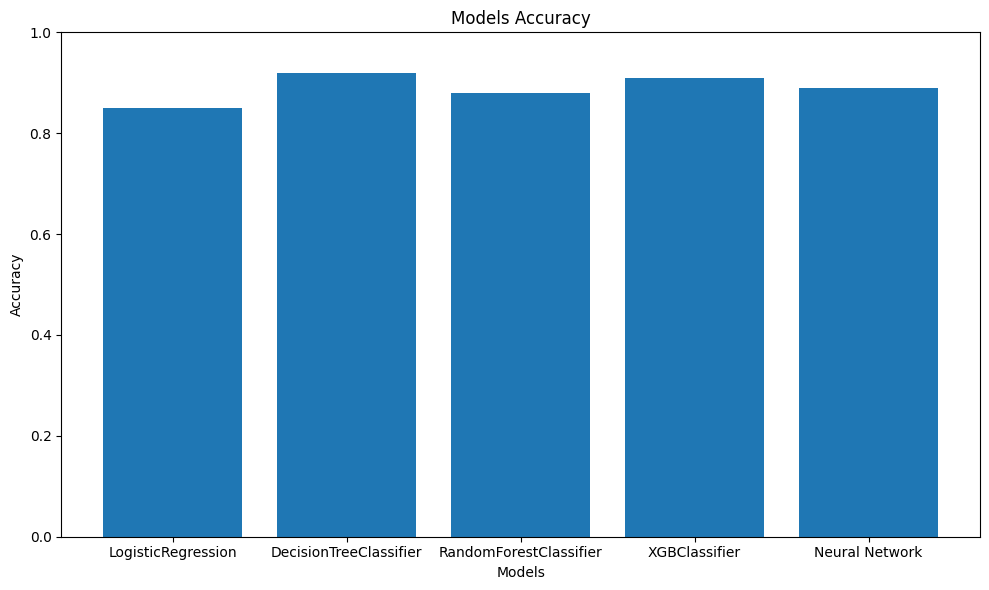

In [148]:
# Assuming 'accuracy' contains your accuracy values
accuracy = [0.85, 0.92, 0.88, 0.91, 0.89]

# Adjust the figure size to provide more horizontal space
plt.figure(figsize=(10, 6))

# Plotting the accuracy values over models
plt.bar(['LogisticRegression', 'DecisionTreeClassifier',
         'RandomForestClassifier', 'XGBClassifier', 'Neural Network'],
        accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models Accuracy')
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Set y-ticks from 0.0 to 1.0
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

DecisionTreeClassifier is slightly better than the others. So now I'll train with all the data and then predic on the real test_data

In [150]:
X_train, y_train = df_transformed.drop('Survived', axis=1), df_transformed['Survived']

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (891, 9)
y_train shape: (891,)


In [156]:
best_model = models["DecisionTreeClassifier"].fit(X_train, y_train)
y_pred = models["DecisionTreeClassifier"].predict(X_train)

print(f"Accuracy: {accuracy_score(y_train, y_pred) * 100:.2f}%")

Accuracy: 89.67%


### Predicting

In [180]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [195]:
y_transformed = preprocessor.fit_transform(df_test)
y_transformed.shape

(418, 9)

In [196]:
# Get the column names after transformation
numeric_columns = preprocessor.transformers_[0][1]['scaler'].get_feature_names_out(['Fare', 'Age'])  # Numeric column names
categorical_columns = preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(['Sex', 'Embarked'])  # Categorical column names

# Identify the passthrough column indices
passthrough_indices = [i for i, col in enumerate(df_train.columns) if col not in ['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'Fare', 'Age']]

# Combine all column names including numeric, categorical, and passthrough columns
all_columns = list(numeric_columns) + list(categorical_columns) + list(df_train.columns[passthrough_indices])

# Create the new DataFrame with transformed columns and original column names
test_transformed = pd.DataFrame(y_transformed, columns=all_columns)

# Converting back to integer
test_transformed['Sex_male'] = test_transformed['Sex_male'].astype(int)
test_transformed['Embarked_C'] = test_transformed['Embarked_C'].astype(int)
test_transformed['Embarked_Q'] = test_transformed['Embarked_Q'].astype(int)
test_transformed['Embarked_S'] = test_transformed['Embarked_S'].astype(int)
test_transformed['Pclass'] = test_transformed['Pclass'].astype(int)
test_transformed['SibSp'] = test_transformed['SibSp'].astype(int)
test_transformed['Parch'] = test_transformed['Parch'].astype(int)

display(test_transformed.head())
display(test_transformed.tail())
display(test_transformed.info())
display(test_transformed.describe())

,Fare,Age,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,SibSp,Parch
0,-0.498407,0.334993,1,0,1,0,3,0,0
1,-0.513274,1.325530,0,0,0,1,3,1,0
2,-0.465088,2.514175,1,0,1,0,2,0,0
3,-0.483466,-0.259330,1,0,0,1,3,0,0
4,-0.418471,-0.655545,0,0,0,1,3,1,1


,Fare,Age,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,SibSp,Parch
413,-0.494448,0.000000,1,0,0,1,3,0,0
414,1.313753,0.691586,0,1,0,0,1,0,0
415,-0.508792,0.651965,1,0,0,1,3,0,0
416,-0.494448,0.000000,1,0,0,1,3,0,0
417,-0.237906,0.000000,1,1,0,0,3,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fare        418 non-null    float64
 1   Age         418 non-null    float64
 2   Sex_male    418 non-null    int64  
 3   Embarked_C  418 non-null    int64  
 4   Embarked_Q  418 non-null    int64  
 5   Embarked_S  418 non-null    int64  
 6   Pclass      418 non-null    int64  
 7   SibSp       418 non-null    int64  
 8   Parch       418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


None

,Fare,Age,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,SibSp,Parch
count,4.180000e+02,4.180000e+02,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,-1.806104e-17,3.187243e-17,0.636364,0.244019,0.110048,0.645933,2.265550,0.447368,0.392344
std,1.001198e+00,1.001198e+00,0.481622,0.430019,0.313324,0.478803,0.841838,0.896760,0.981429
min,-6.387815e-01,-2.385419e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-4.972129e-01,-5.763018e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-3.796234e-01,0.000000e+00,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
75%,-7.399887e-02,4.340463e-01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000
max,8.547081e+00,3.623577e+00,1.000000,1.000000,1.000000,1.000000,3.000000,8.000000,9.000000


In [197]:
y_pred = best_model.predict(test_transformed)

In [199]:
y_pred.shape

(418,)

In [202]:
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Conclusion